In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/CSILMS/online_retail_II.xlsx')


In [ ]:
# Data Cleaning
df.dropna(subset=['Customer ID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]


<ipython-input-17-57405f5dd337>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Customer ID'], inplace=True)
<ipython-input-17-57405f5dd337>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Feature Engineering
df['TotalPrice'] = df['Quantity'] * df['Price']
customer_df = df.groupby('Customer ID').agg({
    'Invoice': 'count',
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'InvoiceDate': lambda x: (x.max() - x.min()).days,
    'Country': 'first'
}).reset_index()

customer_df.columns = ['Customer ID', 'Frequency', 'TotalQuantity', 'TotalValue', 'Recency', 'Country']

In [ ]:

# Calculate Historical CLV
customer_df['CLV'] = customer_df['TotalValue']

In [ ]:
# Prepare the Data for Modeling
X = customer_df[['Frequency', 'TotalQuantity', 'Recency']]
y = customer_df['CLV']

In [ ]:

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)



1.   List item
2.   List item



In [ ]:
# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 608.0285684052608
Root Mean Squared Error: 2011.5393282545388
R-squared: 0.8548117078012072


In [ ]:
# Predict Future CLV for All Customers
customer_df['Predicted_CLV'] = model.predict(customer_df[['Frequency', 'TotalQuantity', 'Recency']])

In [29]:

# Display the DataFrame with Predicted CLV
print(customer_df[['Customer ID', 'CLV', 'Predicted_CLV']].head(20))


    Customer ID       CLV  Predicted_CLV
0       12346.0    372.86     322.003000
1       12347.0   1323.32    1325.094400
2       12348.0    222.16     280.285500
3       12349.0   2671.14    2313.847200
4       12351.0    300.93     326.465000
5       12352.0    343.80     359.230400
6       12353.0    317.76     307.608000
7       12355.0    488.21     515.008100
8       12356.0   3562.25    2643.436100
9       12357.0  12079.99    9886.820300
10      12358.0   2719.01    2703.199700
11      12359.0   2563.36    2407.780100
12      12360.0   1590.83    1982.069000
13      12361.0    321.35     389.031400
14      12362.0    130.00     816.948086
15      12366.0    500.24     419.214200
16      12368.0    917.70     767.959900
17      12369.0   1791.15    2279.641700
18      12370.0    774.62     757.700200
19      12371.0   2179.42    2070.225600


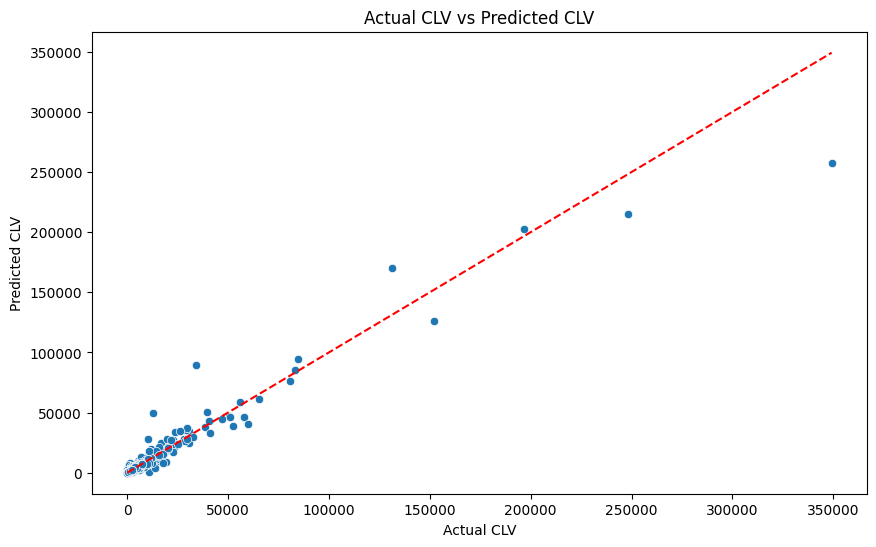

In [35]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_df['CLV'], y=customer_df['Predicted_CLV'])
plt.title('Actual CLV vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.plot([customer_df['CLV'].min(), customer_df['CLV'].max()],
          [customer_df['CLV'].min(), customer_df['CLV'].max()],
          'r--')  # Line showing perfect prediction
plt.show()